In [29]:
import os
from pathlib import Path
import json
import pandas as pd

In [30]:
conda_meta_path = Path(os.environ["CONDA_PREFIX"]) / "conda-meta"

In [31]:
licenses = []
for file in conda_meta_path.glob("*.json"):
    with open(file, "r") as f:
        licenses.append(json.load(f)["license"])

licenses = pd.Series(licenses).value_counts(ascending=True)

<AxesSubplot:>

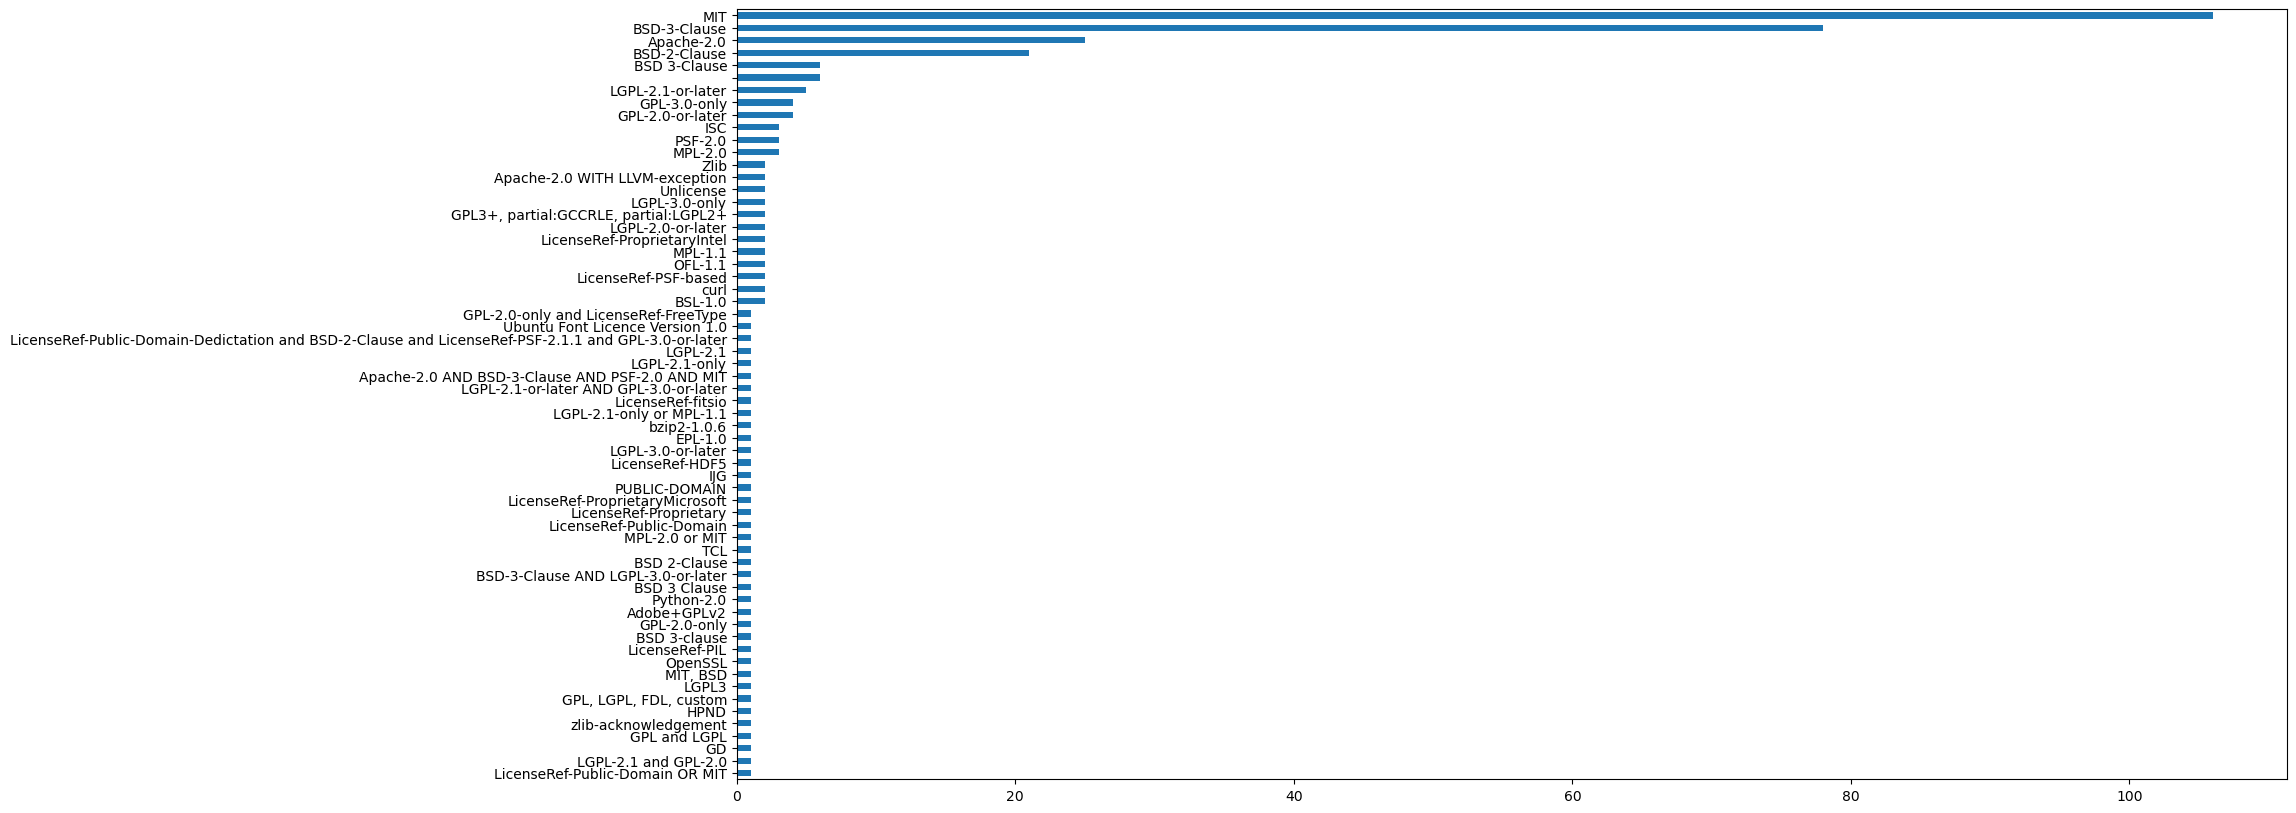

In [32]:
licenses.plot(kind="barh", figsize=(20,10))

Drop columns with acceptable licences

In [51]:
licenses.drop(list(acceptable_licenses.filter(regex="GPL").index))

LicenseRef-Public-Domain OR MIT                      1
GD                                                   1
zlib-acknowledgement                                 1
HPND                                                 1
MIT, BSD                                             1
OpenSSL                                              1
LicenseRef-PIL                                       1
BSD 3-clause                                         1
Python-2.0                                           1
BSD 3 Clause                                         1
BSD 2-Clause                                         1
TCL                                                  1
MPL-2.0 or MIT                                       1
LicenseRef-Public-Domain                             1
LicenseRef-Proprietary                               1
LicenseRef-ProprietaryMicrosoft                      1
PUBLIC-DOMAIN                                        1
IJG                                                  1
LicenseRef

In [57]:
acceptable_licence_strings = ["MIT", "BSD", "Apache", "GPL", "MPL", "Unlicense", "PUBLIC-DOMAIN"]
licenses_investigate = licenses
for acceptable in acceptable_licence_strings:
    licenses_investigate = licenses_investigate.drop(list(licenses_investigate.filter(regex=acceptable).index))

<AxesSubplot:>

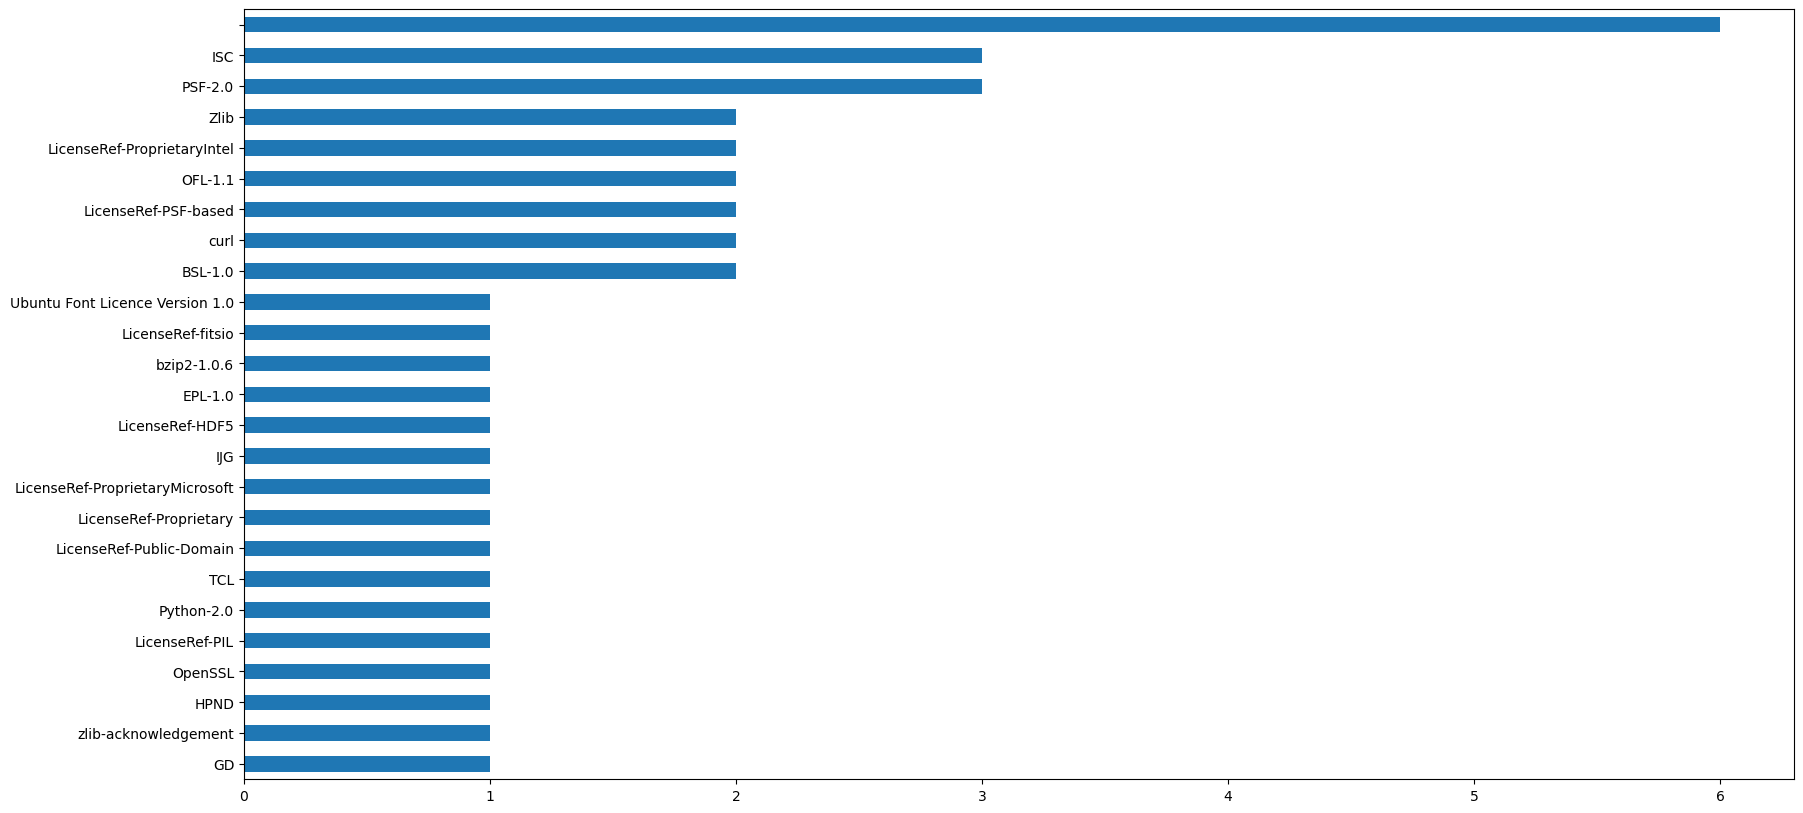

In [58]:
licenses_investigate.plot(kind="barh", figsize=(20,10))